## Supporting Artifact

In [1]:
from google.colab import files
uploaded = files.upload()
supportingDocument = files.upload()

Saving fifaValue.csv to fifaValue (1).csv


Saving SupportingData.xlsx to SupportingData (1).xlsx


In [2]:
import pandas as pd
import numpy as np
import xlrd
from sklearn import preprocessing

players = pd.read_csv("fifaValue.csv", delimiter=',', header=0)


In [3]:
players.describe(include='all')
#players.info

,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
count,18207.000000,18207,17966,18159,18159.000000,18159.000000,18159.000000,18159,18147,17918,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207
unique,NaN,164,651,2,NaN,NaN,NaN,9,27,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
top,NaN,England,FC Barcelona,Right,NaN,NaN,NaN,Medium/ Medium,ST,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,�1.1M
freq,NaN,1662,33,13948,NaN,NaN,NaN,9810,2152,4819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431
mean,25.122206,NaN,NaN,NaN,1.113222,2.947299,2.361308,NaN,NaN,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,4.669943,NaN,NaN,NaN,0.394031,0.660456,0.756164,NaN,NaN,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,16.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,21.000000,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,25.000000,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,28.000000,NaN,NaN,NaN,1.000000,3.000000,3.000000,NaN,NaN,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


# Data Cleanising

In [4]:
#Find NaN value and Dropping from Dataset
newPlayers = players

rows_with_nan = [index for index, row in newPlayers.iterrows() if row.isnull().any()]

#Dropping row with NaN value
newPlayers = newPlayers.drop(rows_with_nan)

# Reseting Indexes
newPlayers.reset_index()


,index,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
0,0,31,Argentina,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,RF,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,�110.5M
1,1,33,Portugal,Juventus,Right,5.0,4.0,5.0,High/ Low,ST,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,�77M
2,2,26,Brazil,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,LW,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,�118.5M
3,3,27,Spain,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,GK,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,�72M
4,4,27,Belgium,Manchester City,Right,4.0,5.0,4.0,High/ High,RCM,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,�102M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,19,England,Crewe Alexandra,Right,1.0,2.0,2.0,Medium/ Medium,CM,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,�60K
17914,18203,19,Sweden,Trelleborgs FF,Right,1.0,2.0,2.0,Medium/ Medium,ST,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,�60K
17915,18204,16,England,Cambridge United,Right,1.0,3.0,2.0,Medium/ Medium,ST,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,�60K
17916,18205,17,England,Tranmere Rovers,Right,1.0,3.0,2.0,Medium/ Medium,RW,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,�60K


In [5]:
newPlayers.isnull().sum()

Age                         0
Nationality                 0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Intercepti

In [6]:
# Data Cleansing
import xlrd
from pandas import *
import json
import re 

#SheetName in Supporting Data 
sheetName = ['NationalityContinent','League','Position']

for sheet in sheetName:
  #Converting excel into json 
  nc_df = pandas.read_excel('SupportingData.xlsx', sheet_name=sheet,header=0)

  #Converting into json
  json_dump =nc_df.to_json(orient='records')

  data = np.array(json.loads(json_dump))
  
  if sheet == 'NationalityContinent':
    df = newPlayers['Nationality'].str.replace('[^A-Za-z0-9�?]+ ', '')
  elif sheet == 'League':
    df = newPlayers['Club'].str.replace('[^A-Za-z0-9�?]+ ', '')
  elif sheet == 'Position':
    df = newPlayers['Position'].str.replace('[^A-Za-z0-9�?]+ ', '')

  NRM_LIST = []
  for each in df:
    for iteam in data:
      key_list = list(iteam.keys())
      actual_value = key_list[0]
      NRM_value = key_list[1]
      if each == (re.sub('[^A-Za-z0-9�?]+ ', '', iteam[actual_value])):
        NRM_LIST.append(iteam[NRM_value])
      else:
        NRM_LIST.append(iteam[NRM_value])
  
  newPlayers["NRM_"+sheet] = Series(NRM_LIST)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.


In [7]:
newPlayers.isnull().sum()

Age                         0
Nationality                 0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Intercepti

In [8]:
# Contract Valid Until
# Convert Year and replaced Null with NA
from os import error
from datetime import datetime
import numpy as np

new_CVU = []

for each in newPlayers["Contract Valid Until"]:
  try:
    if len(each) == 9 :
      data = '20' + each[7:9]
      new_CVU.append(data)
    elif len(each) == 8:
      data = '20' + each[6:8]
      new_CVU.append(data)
    else:
      data = each
      new_CVU.append(each)
  except Exception :
    new_CVU.append('NaN')
  
newPlayers["NRM_CVU"] = new_CVU


In [9]:
for each in newPlayers["NRM_CVU"]:
  if each == '2009':
    print('Here....')

In [10]:
# Removing Special Character Value
# Removing Special Character from Variable “Value”

import decimal
df = newPlayers['Value'].str.replace('[�]','')

# Converting K to Mill if Required
new_Value = []
for each in df:
  if 'K' in each:
    data = str(round(decimal.Decimal(int(each.replace('K',''))/1000000),6))
    new_Value.append(data)
  else:
    data = each.replace("M",'')
    new_Value.append(data)

newPlayers["NRM_Value_Mil"] = new_Value

#Converting object into Float and raise raise exceptions for invalid
newPlayers["NRM_Value_Mil"] = newPlayers["NRM_Value_Mil"].astype(float, errors = 'raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [11]:
# Dropping row with Zero value 

rows_with_zero = newPlayers.index[newPlayers['NRM_Value_Mil'] == 0.0].tolist()

newPlayers=newPlayers.drop(rows_with_zero)

newPlayers.reset_index()

,index,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value,NRM_NationalityContinent,NRM_League,NRM_Position,NRM_CVU,NRM_Value_Mil
0,0,31,Argentina,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,RF,...,11.0,15.0,14.0,8.0,�110.5M,Asia,Bundesliga 2,ATT,2021,110.50000
1,1,33,Portugal,Juventus,Right,5.0,4.0,5.0,High/ Low,ST,...,11.0,15.0,14.0,11.0,�77M,Europe,Bundesliga 2,ATT,2022,77.00000
2,2,26,Brazil,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,LW,...,9.0,15.0,15.0,11.0,�118.5M,Africa,3. Liga,ATT,2022,118.50000
3,3,27,Spain,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,GK,...,85.0,87.0,88.0,94.0,�72M,Europe,Bundesliga 2,ATT,2020,72.00000
4,4,27,Belgium,Manchester City,Right,4.0,5.0,4.0,High/ High,RCM,...,13.0,5.0,10.0,13.0,�102M,Africa,Bundesliga 2,ATT,2023,102.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,18202,19,England,Crewe Alexandra,Right,1.0,2.0,2.0,Medium/ Medium,CM,...,13.0,7.0,8.0,9.0,�60K,Africa,Meiji Yasuda J1,ATT,2019,0.00006
17903,18203,19,Sweden,Trelleborgs FF,Right,1.0,2.0,2.0,Medium/ Medium,ST,...,9.0,9.0,5.0,12.0,�60K,Africa,Eredivisie,ATT,2020,0.00006
17904,18204,16,England,Cambridge United,Right,1.0,3.0,2.0,Medium/ Medium,ST,...,5.0,10.0,6.0,13.0,�60K,Asia,Liga do Brasil,ATT,2021,0.00006
17905,18205,17,England,Tranmere Rovers,Right,1.0,3.0,2.0,Medium/ Medium,RW,...,6.0,14.0,8.0,9.0,�60K,Europe,Liga NOS,ATT,2019,0.00006


In [12]:
rows_with_zero = newPlayers.index[newPlayers['NRM_Value_Mil'] == 0.0].tolist()

print(rows_with_zero)

[]


In [13]:
# Converting Height to CM 

df_height = newPlayers['Height'].str.replace("'",'.')

#Replace Null value with "NA"
df_height.fillna("NA", inplace = True)

# 12 incheas to 1 Foot
inch_to_foot = 12

NRM_Height = []
for x in df_height:
  if x != "NA":
    data = inch_to_foot * float(x)
    NRM_Height.append(round(data,2))
  else:
    data = 0
    NRM_Height.append(data)

newPlayers["NRM_Height"] = NRM_Height

# Remove Scale from Weight
df_weight = newPlayers['Weight'].str.replace("lbs",'')

newPlayers["NRM_Weight"] = df_weight.astype(float, errors = 'raise')

newPlayers["NRM_WorkRate"] = newPlayers["Work Rate"].str.replace("/ ",'-')

newPlayers.rename(columns={"'Preferred Foot'":'Preferred_Foot'}, inplace=True)

In [14]:
# Dropping Redundant features

dropFeatureList = ['Nationality', 'Club','Position','Contract Valid Until','Height','Value','Weight','Work Rate']

newPlayers = newPlayers.drop((dropFeatureList) , axis = 1)

newPlayers.reset_index()

,index,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKPositioning,GKReflexes,NRM_NationalityContinent,NRM_League,NRM_Position,NRM_CVU,NRM_Value_Mil,NRM_Height,NRM_Weight,NRM_WorkRate
0,0,31,Left,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,14.0,8.0,Asia,Bundesliga 2,ATT,2021,110.50000,68.40,159.0,Medium-Medium
1,1,33,Right,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,14.0,11.0,Europe,Bundesliga 2,ATT,2022,77.00000,74.40,183.0,High-Low
2,2,26,Right,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,15.0,11.0,Africa,3. Liga,ATT,2022,118.50000,70.80,150.0,High-Medium
3,3,27,Right,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,88.0,94.0,Europe,Bundesliga 2,ATT,2020,72.00000,76.80,168.0,Medium-Medium
4,4,27,Right,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,10.0,13.0,Africa,Bundesliga 2,ATT,2023,102.00000,61.32,154.0,High-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,18202,19,Right,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,8.0,9.0,Africa,Meiji Yasuda J1,ATT,2019,0.00006,70.80,134.0,Medium-Medium
17903,18203,19,Right,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,5.0,12.0,Africa,Eredivisie,ATT,2020,0.00006,75.60,170.0,Medium-Medium
17904,18204,16,Right,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,6.0,13.0,Asia,Liga do Brasil,ATT,2021,0.00006,69.60,148.0,Medium-Medium
17905,18205,17,Right,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,8.0,9.0,Europe,Liga NOS,ATT,2019,0.00006,61.20,154.0,Medium-Medium


# Standardization and Dummy Variables

In [15]:
! pip install category_encoders
#newPlayers

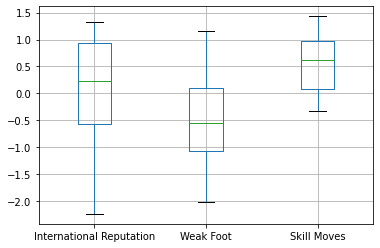

In [16]:
# ===================   Review skewed Categories  ===================#
import matplotlib.pyplot as plt

#newPlayers.boxplot(figsize= [30,10], rot=90 columns= ["International Reputation", "Weak Foot", "Skill Moves"])

np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 3),
                  columns = ["International Reputation", "Weak Foot", "Skill Moves"])
boxplot = df.boxplot(column=["International Reputation", "Weak Foot", "Skill Moves"]) 

In [17]:
# ===================   Change Data Types  ===================#
# Create list for skewed categories /5

fivestar = ["International Reputation", "Weak Foot", "Skill Moves"]

for i in fivestar:
  
  newPlayers[i]=newPlayers[i].values.astype('int32')
  newPlayers[i]=newPlayers[i].values.astype('str')

In [18]:
newPlayers.dtypes


Age                           int64
Preferred Foot               object
International Reputation     object
Weak Foot                    object
Skill Moves                  object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     float64
Stamina                     float64
Strength                    float64
LongShots                   float64
Aggression                  float64
Interceptions               float64
Positioning                 

In [19]:
#=========== Preparing Data ======================#
response_DF = newPlayers["NRM_Value_Mil"]
features_DF = newPlayers.drop(['NRM_Value_Mil'], axis = 1)

# Will be use as response variables in SVM RBF 
y_svm = features_DF['NRM_Position']

In [20]:
# ===================   Standardization ===================#
import category_encoders as ce
from sklearn import preprocessing

sdvDF = features_DF

z_dataType = ['int64','float64']
dv_dataType = ['object']

features = sdvDF.columns
dv_list = []
z_list = []

# ============= Preprocessing numerical data ================#
for feature in features:
  if sdvDF.dtypes[feature] in z_dataType:
    z_list.append(feature)

# 4/27/2022: transform to z-score
for zz in z_list:
  sdvDF[zz] = preprocessing.scale(sdvDF[zz])

#====================== Dummy Varaibles =====================#
# Converting categorical varaibles to boolean value 
encoder = ce.OneHotEncoder(use_cat_names=True)
# sdvDF = encoder.fit_transform(sdvDF['NRM_Position'])

for feature in features:
  if sdvDF.dtypes[feature] in dv_dataType:
    dv_list.append(feature)

print(dv_list)
prefix_list = ['Preferred Foot', 'International Reputation', "Weak Foot", "Skill Moves"]
y_list = ['NRM_Position']

for dv in dv_list:

  if dv not in prefix_list:
    if dv not in y_list:
      dummy = "dummy_{}".format(dv)
      dummy = pd.get_dummies(sdvDF[dv], drop_first=True)
    else:
      # Dummy varaible without dropping attributes
      dummy = encoder.fit_transform(sdvDF[dv])
  else:
    clm = dv.replace(' ', '_')
    dummy = "dummy_{}".format(clm)
    dummy = pd.get_dummies(sdvDF[dv], drop_first=True, prefix=dv)

  sdvDF = pd.concat([sdvDF,dummy], axis=1)

#Dropping Not used varaibles 
x_df = sdvDF.drop((dv_list), axis=1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'NRM_NationalityContinent', 'NRM_League', 'NRM_Position', 'NRM_CVU', 'NRM_WorkRate']


In [21]:
pd.set_option('max_columns', None)
x_df

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Preferred Foot_Right,International Reputation_2,International Reputation_3,International Reputation_4,International Reputation_5,Weak Foot_2,Weak Foot_3,Weak Foot_4,Weak Foot_5,Skill Moves_2,Skill Moves_3,Skill Moves_4,Skill Moves_5,Asia,Cannot Find,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,NRM_Position_ATT,NRM_Position_DEF,NRM_Position_GK,NRM_Position_MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.266967,1.866287,2.532592,1.019584,2.131948,2.435095,2.200151,2.490271,2.924839,2.239383,2.255790,1.767219,1.451590,1.860890,3.677228,2.193637,1.714242,0.243120,0.552695,-0.503957,2.434940,-0.454119,-1.193327,2.254270,2.873965,1.686544,3.270217,-0.717710,-0.909340,-0.923548,-0.599458,-0.317944,-0.073062,-0.138678,-0.484584,-0.216340,-0.446371,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.696128,1.866287,2.481339,2.113984,1.518590,2.491640,1.723925,1.837533,1.894920,1.585990,2.135750,1.633224,1.792998,1.589867,3.788063,0.426288,2.295220,2.525831,1.560233,1.089538,2.382984,0.410407,-0.855012,2.305508,2.023412,2.324083,3.182657,-0.969318,-0.770751,-1.064588,-0.542839,-0.317944,-0.073062,-0.138678,-0.317141,0.898793,1.091885,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.194065,1.593822,2.122566,0.558785,1.723043,2.322004,2.147237,2.218297,2.524315,1.651329,2.195770,1.968210,1.724717,2.199669,3.566392,1.416004,1.423753,-0.348694,1.119435,-1.300705,1.811470,0.006962,-0.516697,1.998079,2.377809,2.069067,3.095097,-1.019639,-1.094126,-0.594456,-0.429601,-0.436463,-0.073062,-0.079818,-0.317141,0.229714,-1.023217,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.408646,-1.784753,-1.670174,-1.802815,-0.594090,-1.692712,-1.980059,-1.426159,-1.366489,-0.112832,-0.985276,-0.510686,-0.460293,-0.239538,3.123050,-1.482450,-1.423036,0.158575,-1.273468,-0.105583,-1.825438,-1.030469,-0.806681,-1.947258,1.031099,-0.544844,0.818526,-1.623498,-1.232715,-1.534720,4.156558,4.067261,4.299363,4.216959,4.315441,1.344847,0.130475,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.408646,2.356726,1.866300,0.155585,2.268250,2.208914,1.618097,2.055112,2.295444,2.500740,1.955691,0.896255,0.768775,1.047821,3.233885,0.921146,2.062829,-0.179604,1.686175,0.770839,2.279073,1.159663,0.691572,1.895603,2.873965,1.941559,2.569734,1.043545,0.476553,0.251782,-0.089885,-0.199425,-0.680344,-0.374118,-0.205512,-1.532197,-0.766841,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Pre Check Data Quality

In [22]:
pd.set_option('display.max_columns', None)
print(x_df.shape)

x_df.head()


(17907, 111)


,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Preferred Foot_Right,International Reputation_2,International Reputation_3,International Reputation_4,International Reputation_5,Weak Foot_2,Weak Foot_3,Weak Foot_4,Weak Foot_5,Skill Moves_2,Skill Moves_3,Skill Moves_4,Skill Moves_5,Asia,Cannot Find,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,NRM_Position_ATT,NRM_Position_DEF,NRM_Position_GK,NRM_Position_MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.266967,1.866287,2.532592,1.019584,2.131948,2.435095,2.200151,2.490271,2.924839,2.239383,2.255790,1.767219,1.451590,1.860890,3.677228,2.193637,1.714242,0.243120,0.552695,-0.503957,2.434940,-0.454119,-1.193327,2.254270,2.873965,1.686544,3.270217,-0.717710,-0.909340,-0.923548,-0.599458,-0.317944,-0.073062,-0.138678,-0.484584,-0.216340,-0.446371,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.696128,1.866287,2.481339,2.113984,1.518590,2.491640,1.723925,1.837533,1.894920,1.585990,2.135750,1.633224,1.792998,1.589867,3.788063,0.426288,2.295220,2.525831,1.560233,1.089538,2.382984,0.410407,-0.855012,2.305508,2.023412,2.324083,3.182657,-0.969318,-0.770751,-1.064588,-0.542839,-0.317944,-0.073062,-0.138678,-0.317141,0.898793,1.091885,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.194065,1.593822,2.122566,0.558785,1.723043,2.322004,2.147237,2.218297,2.524315,1.651329,2.195770,1.968210,1.724717,2.199669,3.566392,1.416004,1.423753,-0.348694,1.119435,-1.300705,1.811470,0.006962,-0.516697,1.998079,2.377809,2.069067,3.095097,-1.019639,-1.094126,-0.594456,-0.429601,-0.436463,-0.073062,-0.079818,-0.317141,0.229714,-1.023217,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.408646,-1.784753,-1.670174,-1.802815,-0.594090,-1.692712,-1.980059,-1.426159,-1.366489,-0.112832,-0.985276,-0.510686,-0.460293,-0.239538,3.123050,-1.482450,-1.423036,0.158575,-1.273468,-0.105583,-1.825438,-1.030469,-0.806681,-1.947258,1.031099,-0.544844,0.818526,-1.623498,-1.232715,-1.534720,4.156558,4.067261,4.299363,4.216959,4.315441,1.344847,0.130475,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.408646,2.356726,1.866300,0.155585,2.268250,2.208914,1.618097,2.055112,2.295444,2.500740,1.955691,0.896255,0.768775,1.047821,3.233885,0.921146,2.062829,-0.179604,1.686175,0.770839,2.279073,1.159663,0.691572,1.895603,2.873965,1.941559,2.569734,1.043545,0.476553,0.251782,-0.089885,-0.199425,-0.680344,-0.374118,-0.205512,-1.532197,-0.766841,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Finding any column with Null value 
x_df.isnull().sum().sort_values(ascending=False)/x_df.shape[0]


Age                0.0
K-League 1         0.0
Pro League         0.0
Premier League     0.0
Meiji Yasuda J1    0.0
                  ... 
GKPositioning      0.0
GKKicking          0.0
GKHandling         0.0
GKDiving           0.0
Medium-Medium      0.0
Length: 111, dtype: float64

## Preparing the Data

In [24]:
#=========== Preparing Data ======================#
y = response_DF
X = x_df

In [25]:
x_df

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Preferred Foot_Right,International Reputation_2,International Reputation_3,International Reputation_4,International Reputation_5,Weak Foot_2,Weak Foot_3,Weak Foot_4,Weak Foot_5,Skill Moves_2,Skill Moves_3,Skill Moves_4,Skill Moves_5,Asia,Cannot Find,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,NRM_Position_ATT,NRM_Position_DEF,NRM_Position_GK,NRM_Position_MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.266967,1.866287,2.532592,1.019584,2.131948,2.435095,2.200151,2.490271,2.924839,2.239383,2.255790,1.767219,1.451590,1.860890,3.677228,2.193637,1.714242,0.243120,0.552695,-0.503957,2.434940,-0.454119,-1.193327,2.254270,2.873965,1.686544,3.270217,-0.717710,-0.909340,-0.923548,-0.599458,-0.317944,-0.073062,-0.138678,-0.484584,-0.216340,-0.446371,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.696128,1.866287,2.481339,2.113984,1.518590,2.491640,1.723925,1.837533,1.894920,1.585990,2.135750,1.633224,1.792998,1.589867,3.788063,0.426288,2.295220,2.525831,1.560233,1.089538,2.382984,0.410407,-0.855012,2.305508,2.023412,2.324083,3.182657,-0.969318,-0.770751,-1.064588,-0.542839,-0.317944,-0.073062,-0.138678,-0.317141,0.898793,1.091885,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.194065,1.593822,2.122566,0.558785,1.723043,2.322004,2.147237,2.218297,2.524315,1.651329,2.195770,1.968210,1.724717,2.199669,3.566392,1.416004,1.423753,-0.348694,1.119435,-1.300705,1.811470,0.006962,-0.516697,1.998079,2.377809,2.069067,3.095097,-1.019639,-1.094126,-0.594456,-0.429601,-0.436463,-0.073062,-0.079818,-0.317141,0.229714,-1.023217,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.408646,-1.784753,-1.670174,-1.802815,-0.594090,-1.692712,-1.980059,-1.426159,-1.366489,-0.112832,-0.985276,-0.510686,-0.460293,-0.239538,3.123050,-1.482450,-1.423036,0.158575,-1.273468,-0.105583,-1.825438,-1.030469,-0.806681,-1.947258,1.031099,-0.544844,0.818526,-1.623498,-1.232715,-1.534720,4.156558,4.067261,4.299363,4.216959,4.315441,1.344847,0.130475,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.408646,2.356726,1.866300,0.155585,2.268250,2.208914,1.618097,2.055112,2.295444,2.500740,1.955691,0.896255,0.768775,1.047821,3.233885,0.921146,2.062829,-0.179604,1.686175,0.770839,2.279073,1.159663,0.691572,1.895603,2.873965,1.941559,2.569734,1.043545,0.476553,0.251782,-0.089885,-0.199425,-0.680344,-0.374118,-0.205512,-1.532197,-0.766841,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Outliers

In [26]:
# Finding outlier
'''
outliers = est2.get_influence()
leverage = outliers.hat_matrix_diag
dffits = outliers.dffits[0]
resid_stu = outliers.resid_studentized_external
cook = outliers.cooks_distance[0]
contat1 = pd.concat([pd.Series(leverage, name = 'leverage'),pd.Series(dffits, name = 'dffits'),
                     pd.Series(resid_stu,name = 'resid_stu'),pd.Series(cook, name = 'cook')],axis = 1)
X_train.index = range(X_train.shape[0])
df_outliers = pd.concat([X_train,contat1], axis = 1)
print("\n.Outliers are:", np.where(np.abs(df_outliers.resid_stu)>2))
'''

'\noutliers = est2.get_influence()\nleverage = outliers.hat_matrix_diag\ndffits = outliers.dffits[0]\nresid_stu = outliers.resid_studentized_external\ncook = outliers.cooks_distance[0]\ncontat1 = pd.concat([pd.Series(leverage, name = \'leverage\'),pd.Series(dffits, name = \'dffits\'),\n                     pd.Series(resid_stu,name = \'resid_stu\'),pd.Series(cook, name = \'cook\')],axis = 1)\nX_train.index = range(X_train.shape[0])\ndf_outliers = pd.concat([X_train,contat1], axis = 1)\nprint("\n.Outliers are:", np.where(np.abs(df_outliers.resid_stu)>2))\n'

[ 30, 119, 166, 269, 299, 301, 303, 306, 320, 347, 360, 448, 463, 488, 501, 576, 661, 680, 684, 715, 874, 887, 929, 969, 1010, 1038, 1041, 1076, 1084, 1113, 1154, 1183, 1200, 1301, 1321, 1327, 1363, 1373, 1379, 1413, 1447, 1466, 1482, 1494, 1536, 1579, 1580, 1603, 1641, 1646, 1681, 1707, 1721, 1732, 1755, 1756, 1760, 1798, 1863, 1896, 1905, 1906, 1945, 1972, 2008, 2030, 2033, 2065, 2068, 2070, 2104, 2113, 2119, 2142, 2187, 2198, 2210, 2311, 2313, 2340, 2357, 2361, 2453, 2467, 2520, 2565, 2567, 2584, 2625, 2638, 2643, 2644, 2681, 2768, 2831, 2840, 2852, 2883, 2893, 2909, 2949, 2982, 3011, 3012, 3062, 3066, 3097, 3137, 3203, 3250, 3294, 3410, 3471, 3601, 3604, 3627, 3671, 3731, 3749, 3780, 3795, 3895, 3901, 3905, 3910, 3963, 3968, 3993, 3994, 3995, 3996, 4039, 4061, 4099, 4100, 4110, 4127, 4154, 4201, 4211, 4219, 4277, 4278, 4283, 4300, 4336, 4346, 4356, 4394, 4397, 4409, 4421, 4451, 4462, 4540, 4543, 4575, 4622, 4738, 4781, 4824, 4831, 4859, 4914, 4929, 4931, 4946, 4967, 4990, 5040, 5080, 5140, 5141, 5149, 5173, 5193, 5222, 5313, 5354, 5399, 5471, 5495, 5532, 5572, 5623, 5624, 5698, 5701, 5836, 5888, 5971, 6026, 6034, 6039, 6044, 6155, 6193, 6315, 6317, 6368, 6399, 6446, 6487, 6499, 6530, 6542, 6557, 6585, 6592, 6602, 6647, 6722, 6757, 6793, 6855, 6935, 7045, 7055, 7068, 7077, 7098, 7124, 7146, 7172, 7180, 7211, 7218, 7275, 7302, 7305, 7339, 7375, 7482, 7520, 7541, 7564, 7609, 7614, 7619, 7664, 7670, 7762, 7798, 7856, 7873, 7877, 7882, 7902, 7958, 7985, 8000, 8044, 8118, 8138, 8151, 8180, 8199, 8231, 8245, 8255, 8269, 8270, 8313, 8349, 8383, 8411, 8418, 8423, 8441, 8450, 8465, 8488, 8492, 8513, 8553, 8597, 8659, 8702, 8718, 8725, 8775, 8777, 8799, 8825, 8863, 8865, 8882, 8919, 8924, 8956, 8967, 8975, 8988, 9026, 9030, 9039, 9116, 9155, 9242, 9272, 9312, 9331, 9338, 9444, 9489, 9567, 9652, 9682, 9710, 9718, 9725, 9829, 9927, 9935, 9947, 9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242, 10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487, 10529, 10541, 10628, 10641, 10678, 10705, 10782, 10814, 10844, 10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084, 11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250, 11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530, 11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701, 11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014, 12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531, 12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860, 12863, 12887, 12924, 12968, 13100, 13181, 13226, 13267, 13277, 13314, 13330, 13357, 13508, 13626, 13691, 13746, 13750, 13759, 13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207, 14237, 14238, 14273, 14318, 14328]

.Outliers are: (array([   30,   119,   166,   269,   299,   301,   303,   306,   320,
         347,   360,   448,   463,   488,   501,   576,   661,   680,
         684,   715,   874,   887,   929,   969,  1010,  1038,  1041,
        1076,  1084,  1113,  1154,  1183,  1200,  1301,  1321,  1327,
        1363,  1373,  1379,  1413,  1447,  1466,  1482,  1494,  1536,
        1579,  1580,  1603,  1641,  1646,  1681,  1707,  1721,  1732,
        1755,  1756,  1760,  1798,  1863,  1896,  1905,  1906,  1945,
        1972,  2008,  2030,  2033,  2065,  2068,  2070,  2104,  2113,
        2119,  2142,  2187,  2198,  2210,  2311,  2313,  2340,  2357,
        2361,  2453,  2467,  2520,  2565,  2567,  2584,  2625,  2638,
        2643,  2644,  2681,  2768,  2831,  2840,  2852,  2883,  2893,
        2909,  2949,  2982,  3011,  3012,  3062,  3066,  3097,  3137,
        3203,  3250,  3294,  3410,  3471,  3601,  3604,  3627,  3671,
        3731,  3749,  3780,  3795,  3895,  3901,  3905,  3910,  3963,
        3968,  3993,  3994,  3995,  3996,  4039,  4061,  4099,  4100,
        4110,  4127,  4154,  4201,  4211,  4219,  4277,  4278,  4283,
        4300,  4336,  4346,  4356,  4394,  4397,  4409,  4421,  4451,
        4462,  4540,  4543,  4575,  4622,  4738,  4781,  4824,  4831,
        4859,  4914,  4929,  4931,  4946,  4967,  4990,  5040,  5080,
        5140,  5141,  5149,  5173,  5193,  5222,  5313,  5354,  5399,
        5471,  5495,  5532,  5572,  5623,  5624,  5698,  5701,  5836,
        5888,  5971,  6026,  6034,  6039,  6044,  6155,  6193,  6315,
        6317,  6368,  6399,  6446,  6487,  6499,  6530,  6542,  6557,
        6585,  6592,  6602,  6647,  6722,  6757,  6793,  6855,  6935,
        7045,  7055,  7068,  7077,  7098,  7124,  7146,  7172,  7180,
        7211,  7218,  7275,  7302,  7305,  7339,  7375,  7482,  7520,
        7541,  7564,  7609,  7614,  7619,  7664,  7670,  7762,  7798,
        7856,  7873,  7877,  7882,  7902,  7958,  7985,  8000,  8044,
        8118,  8138,  8151,  8180,  8199,  8231,  8245,  8255,  8269,
        8270,  8313,  8349,  8383,  8411,  8418,  8423,  8441,  8450,
        8465,  8488,  8492,  8513,  8553,  8597,  8659,  8702,  8718,
        8725,  8775,  8777,  8799,  8825,  8863,  8865,  8882,  8919,
        8924,  8956,  8967,  8975,  8988,  9026,  9030,  9039,  9116,
        9155,  9242,  9272,  9312,  9331,  9338,  9444,  9489,  9567,
        9652,  9682,  9710,  9718,  9725,  9829,  9927,  9935,  9947,
        9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242,
       10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487,
       10529, 10541, 10628, 10641, 10678, 10705, 10782, 10814, 10844,
       10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084,
       11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250,
       11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530,
       11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701,
       11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014,
       12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531,
       12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860,
       12863, 12887, 12924, 12968, 13100, 13181, 13226, 13267, 13277,
       13314, 13330, 13357, 13508, 13626, 13691, 13746, 13750, 13759,
       13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207,
       14237, 14238, 14273, 14318, 14328]),)

In [27]:
#Removeing Outliers
#df = newPlayers.drop(df_outliers)
no_out_DF = newPlayers.drop([ 30, 119, 166, 269, 299, 301, 303, 306, 320, 347, 360, 448, 463, 488, 501, 576, 661, 680, 684, 715, 887, 929, 969, 1010, 1038, 1041, 1076, 1084, 1113, 1154, 1183, 1200, 1301, 1321, 1327, 1363, 1373, 1379, 1413, 1447, 1466, 1482, 1494, 1536, 1579, 1580, 1603, 1641, 1646, 1681, 1707, 1721, 1732, 1755, 1756, 1760, 1798, 1863, 1896, 1905, 1906, 1945, 1972, 2008, 2030, 2033, 2068, 2070, 2104, 2113, 2119, 2142, 2187, 2198, 2210, 2311, 2313, 2340, 2357, 2361, 2453, 2467, 2520, 2565, 2567, 2584, 2625, 2638, 2643, 2644, 2681, 2768, 2831, 2840, 2852, 2883, 2893, 2909, 2949, 2982, 3011, 3012, 3062, 3066, 3097, 3137, 3203, 3250, 3294, 3410, 3471, 3601, 3604, 3627, 3671, 3731, 3749, 3780, 3795, 3895, 3901, 3905, 3910, 3963, 3968, 3993, 3994, 3995, 3996, 4039, 4061, 4099, 4100, 4110, 4127, 4154, 4201, 4211, 4219, 4277, 4278, 4283, 4300, 4336, 4346, 4356, 4394, 4397, 4409, 4421, 4451, 4462, 4540, 4543, 4575, 4622, 4738, 4781, 4824, 4831, 4859, 4914, 4929, 4931, 4946, 4967, 4990, 5040, 5080, 5140, 5141, 5149, 5173, 5193, 5222, 5313, 5354, 5399, 5471, 5495, 5532, 5572, 5623, 5624, 5698, 5701, 5836, 5888, 5971, 6026, 6034, 6039, 6044, 6155, 6193, 6315, 6317, 6368, 6399, 6446, 6487, 6499, 6530, 6557, 6585, 6592, 6602, 6647, 6722, 6757, 6793, 6855, 6935, 7045, 7055, 7068, 7077, 7098, 7124, 7146, 7172, 7180, 7211, 7218, 7275, 7302, 7305, 7339, 7375, 7482, 7520, 7541, 7564, 7609, 7614, 7619, 7664, 7670, 7762, 7798, 7856, 7873, 7877, 7882, 7902, 7958, 7985, 8000, 8044, 8118, 8138, 8151, 8180, 8199, 8231, 8245, 8255, 8269, 8270, 8313, 8349, 8383, 8411, 8418, 8423, 8450, 8465, 8488, 8492, 8513, 8553, 8597, 8659, 8702, 8718, 8725, 8775, 8777, 8799, 8825, 8863, 8865, 8882, 8919, 8924, 8956, 8967, 8975, 8988, 9026, 9030, 9039, 9116, 9155, 9242, 9272, 9312, 9331, 9338, 9444, 9489, 9567, 9652, 9682, 9710, 9718, 9725, 9829, 9927, 9935, 9947, 9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242, 10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487, 10529, 10541, 10641, 10678, 10705, 10782, 10814, 10844, 10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084, 11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250, 11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530, 11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701, 11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014, 12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531, 12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860, 12863, 12887, 12924, 12968, 13100, 13181, 13226, 13314, 13330, 13357, 13626, 13691, 13746, 13750, 13759, 13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207, 14237, 14238, 14273, 14318, 14328],)
#no_out_DF = no_out_DF.to_numpy()

#no_out_DF = no_out_DF.reshape(1,-1)

## Re-Standardization and Rebuilding the model

In [28]:
# Standardization
#import category_encoders as ce
from sklearn import preprocessing

newDF = no_out_DF

#=========== Preparing Data ======================#
new_Response_DF = newDF["NRM_Value_Mil"]
new_Features_DF = newDF.drop(['NRM_Value_Mil'], axis = 1)

z_dataType = ['int64','float64']
dv_dataType = ['object']

features = new_Features_DF.columns
dv_list = []
z_list = []

# ============= Preprocessing numerical data ================#
for feature in features:
  if new_Features_DF.dtypes[feature] in z_dataType:
    z_list.append(feature)

for zz in z_list:
  new_Features_DF[zz] = preprocessing.scale(new_Features_DF[zz])

#====================== Dummy Varaibles =====================#
# Converting categorical varaibles to boolean value 
#encoder = ce.OneHotEncoder(use_cat_names=True)
#newDF = encoder.fit_transform(newDF)
for feature in features:
  if new_Features_DF.dtypes[feature] in dv_dataType:
    dv_list.append(feature)

for dv in dv_list:

  if dv != 'Preferred Foot':
    dummy = "dummy_{}".format(dv)
    dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True)
  else:
    dummy = "dummy_Preferred_Foot"
    dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True)

  new_Features_DF = pd.concat([new_Features_DF,dummy], axis=1)

#Dropping Not used varaibles 
new_X_DF = new_Features_DF.drop((dv_list), axis=1)

In [29]:
! pip install category_encoders

In [30]:
# ===================   Standardization ===================#
import category_encoders as ce
from sklearn import preprocessing

newDF = no_out_DF

#=========== Preparing Data ======================#
new_Response_DF = newDF["NRM_Value_Mil"]
new_Features_DF = newDF.drop(['NRM_Value_Mil'], axis = 1)

# Response varaible to be used in SVM
new_Response_DF_svm = newDF["NRM_Position"]

z_dataType = ['int64','float64']
dv_dataType = ['object']

features = new_Features_DF.columns
dv_list = []
z_list = []

# ============= Preprocessing numerical data ================#
for feature in features:
  if new_Features_DF.dtypes[feature] in z_dataType:
    z_list.append(feature)

for zz in z_list:
  new_Features_DF[zz] = preprocessing.scale(new_Features_DF[zz])

#====================== Dummy Varaibles =====================#
# Converting categorical varaibles to boolean value 
encoder = ce.OneHotEncoder(use_cat_names=True)
# new_Features_DF = encoder.fit_transform(new_Features_DF['NRM_Position'])

for feature in features:
  if new_Features_DF.dtypes[feature] in dv_dataType:
    dv_list.append(feature)

print(dv_list)
prefix_list = ['Preferred Foot', 'International Reputation', "Weak Foot", "Skill Moves"]
y_list = ['NRM_Position']

for dv in dv_list:

  if dv not in prefix_list:
    if dv not in y_list:
      dummy = "dummy_{}".format(dv)
      dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True)
    else:
      # Dummy varaible without dropping attributes
      dummy = encoder.fit_transform(new_Features_DF[dv])
  else:
    clm = dv.replace(' ', '_')
    dummy = "dummy_{}".format(clm)
    dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True, prefix=dv)

  new_Features_DF = pd.concat([new_Features_DF,dummy], axis=1)

#Dropping Not used varaibles 
new_X_DF = new_Features_DF.drop((dv_list), axis=1)

['Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'NRM_NationalityContinent', 'NRM_League', 'NRM_Position', 'NRM_CVU', 'NRM_WorkRate']


## Precheck

In [31]:
# Finding any column with Null value 
new_X_DF.isnull().sum().sort_values(ascending=False)/new_X_DF.shape[0]

Age                0.0
K-League 1         0.0
Pro League         0.0
Premier League     0.0
Meiji Yasuda J1    0.0
                  ... 
GKPositioning      0.0
GKKicking          0.0
GKHandling         0.0
GKDiving           0.0
Medium-Medium      0.0
Length: 111, dtype: float64

## Download to local

In [32]:
from google.colab import files

#newPlayers.to_csv("NRM_Data.csv")
#files.download("NRM_Data.csv")

## Preparing Final Data 

In [33]:
#=========== Preparing Data ======================#
y_1 = new_Response_DF
X_1 = new_X_DF

print(X_1.shape)
print(y_1.shape)

(17478, 111)
(17478,)


In [34]:
X_1

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Preferred Foot_Right,International Reputation_2,International Reputation_3,International Reputation_4,International Reputation_5,Weak Foot_2,Weak Foot_3,Weak Foot_4,Weak Foot_5,Skill Moves_2,Skill Moves_3,Skill Moves_4,Skill Moves_5,Asia,Cannot Find,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,NRM_Position_ATT,NRM_Position_DEF,NRM_Position_GK,NRM_Position_MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.274087,1.869687,2.533979,1.024579,2.132744,2.438560,2.201162,2.495054,2.931748,2.241978,2.256907,1.767021,1.452722,1.862814,3.673881,2.193237,1.717821,0.247464,0.555946,-0.497346,2.438851,-0.447285,-1.187677,2.255190,2.879431,1.689859,3.268254,-0.713862,-0.904873,-0.919846,-0.600019,-0.318896,-0.074398,-0.139771,-0.485147,-0.214561,-0.443714,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.703140,1.869687,2.482750,2.118303,1.520579,2.495094,1.725393,1.842195,1.900879,1.589148,2.137078,1.633134,1.793909,1.591718,3.784367,0.425075,2.298458,2.530325,1.561582,1.094534,2.386897,0.415882,-0.849449,2.306387,2.028231,2.327457,3.180928,-0.965602,-0.766283,-1.060929,-0.543489,-0.318896,-0.074398,-0.139771,-0.317920,0.900086,1.093155,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.201455,1.597355,2.124152,0.564064,1.724634,2.325492,2.148299,2.223029,2.530855,1.654431,2.196992,1.967852,1.725671,2.201684,3.563395,1.415246,1.427502,-0.344389,1.121616,-1.293287,1.815400,0.013071,-0.511221,1.999206,2.382898,2.072418,3.093601,-1.015950,-1.089661,-0.590652,-0.430428,-0.437226,-0.074398,-0.080976,-0.317920,0.231298,-1.020040,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.415981,-1.779564,-1.666748,-1.796076,-0.587990,-1.688422,-1.975034,-1.422097,-1.363542,-0.108211,-0.978497,-0.509064,-0.457921,-0.238183,3.121451,-1.484540,-1.417622,0.162914,-1.266768,-0.099376,-1.821399,-1.022730,-0.801131,-1.942959,1.035165,-0.541732,0.823108,-1.620125,-1.228252,-1.531206,4.148539,4.059331,4.292605,4.211026,4.308683,1.345945,0.132612,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.415981,2.359884,1.868010,0.161113,2.268781,2.212424,1.619666,2.059815,2.301772,2.503110,1.957333,0.896753,0.770350,1.049525,3.231937,0.920161,2.066203,-0.175288,1.687286,0.776158,2.282988,1.163960,0.696737,1.896812,2.879431,1.944898,2.569641,1.048317,0.481034,0.255846,-0.091245,-0.200565,-0.680927,-0.374949,-0.206436,-1.529844,-0.763895,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [35]:
#=========== Preparing Data ======================#
#y = y_1
y = y_svm
X = x_df.drop(['NRM_Position_ATT','NRM_Position_GK','NRM_Position_MID','NRM_Position_DEF'],axis=1)

In [36]:
print(y.shape)
print(X.shape)

(17907,)
(17907, 107)


In [37]:
#=========== Unbalanced Data ======================#

y.value_counts()

MID    7295
ATT    5321
DEF    4633
GK      658
Name: NRM_Position, dtype: int64

In [38]:
type(y)
type(X)


X.to_csv('/content/x.csv', header=True)
y.to_csv('/content/y.csv', header=True)

In [39]:
X.head()
y.head()

0    ATT
1    ATT
2    ATT
3    ATT
4    ATT
Name: NRM_Position, dtype: object

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import time

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sn

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, classification_report, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, auc, accuracy_score 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [42]:
# Cs = [0.1, 1]

# for C in Cs:

#     start = time.time() #Timing the different C values, as lower C should equal lower time to compute.
#     # This was mentioned in the notes as something to discuss

#     clf = svm.SVC(kernel='rbf', C=C, probability = True)
#     clf.fit(X_train, y_train)

#     end = time.time()
   

#     yhat = clf.predict_proba(X_test)   # probability
#     y_pred = clf.predict(X_test)   # class label

#     Stats = classification_report(y_pred, y_test)
    
#     print('Classification Report for a C of:', C)
#     print("Time elapsed:", end - start)
#     print(Stats)

In [43]:
# Gs = [0.1, 0.5, 1, 2, 3, 20]

# for G in Gs:

#     start = time.time() #Timing the different G values
    
#     clf = svm.SVC(kernel='rbf', C=1, probability = True, gamma=G)
#     clf.fit(X_train, y_train)
    
#     end = time.time()
   
    
#     yhat = clf.predict_proba(X_test)   # probability
#     y_pred = clf.predict(X_test)       # class label
    
#     Stats = classification_report(y_pred, y_test)
    
#     print('Classification Report for a Gamma of:', G)
#     print("Time elapsed:", end - start)
#     print(Stats)

Choose Model

In [44]:
# C = 1.0 	
# G = 0.1

# start = time.time() #Timing

# clf = svm.SVC(kernel='rbf', C=C, probability = True)
# clf.fit(X_train, y_train)

# end = time.time()
   

# yhat = clf.predict_proba(X_test)   # probability
# y_pred = clf.predict(X_test)   # class label

In [45]:
# Stats = classification_report(y_pred, y_test)

# print('Classification Report for a Gamma of:', G, 'and a C of:', C)
# print("Time elapsed:", end - start)
# print(Stats)

Classification Report for a Gamma of: 0.1
Time elapsed: 162.65489959716797
              precision    recall  f1-score   support

         ATT       0.00      0.62      0.01         8
         DEF       0.00      0.00      0.00         0
          GK       0.00      0.00      0.00         0
         MID       1.00      0.40      0.57      5365

    accuracy                           0.40      5373
   macro avg       0.25      0.26      0.15      5373
weighted avg       1.00      0.40      0.57      5373



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SMOTE (Synthetic Minority Oversampling Technique)

In [59]:
# from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
# from collections import Counter

# X_resampled, y_resampled = SMOTE(sampling_strategy='not majority').fit_resample(X_train, y_train)
# print(Counter(y_train))
# print(Counter(y_resampled))

# # https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn

Counter({'MID': 5131, 'ATT': 3728, 'DEF': 3221, 'GK': 454})
Counter({'GK': 5131, 'DEF': 5131, 'ATT': 5131, 'MID': 5131})


In [63]:
# Cs = [0.01, 0.1, 1]

# for C in Cs:

#     start = time.time() #Timing the different C values, as lower C should equal lower time to compute.
#     # This was mentioned in the notes as something to discuss

#     clf = svm.SVC(kernel='rbf', C=C, probability = True)
#     clf.fit(X_resampled, y_resampled)

#     end = time.time()
   

#     yhat = clf.predict_proba(X_test)   # probability
#     y_pred = clf.predict(X_test)   # class label

#     Stats = classification_report(y_pred, y_test)
    
#     print('Classification Report for a C of:', C)
#     print("Time elapsed:", end - start)
#     print(Stats)

Classification Report for a C of: 0.01
Time elapsed: 429.4572422504425
              precision    recall  f1-score   support

         ATT       0.15      0.31      0.20       764
         DEF       0.27      0.27      0.27      1418
          GK       0.24      0.03      0.06      1495
         MID       0.32      0.41      0.36      1696

    accuracy                           0.25      5373
   macro avg       0.24      0.26      0.22      5373
weighted avg       0.26      0.25      0.23      5373

Classification Report for a C of: 0.1
Time elapsed: 366.5235631465912
              precision    recall  f1-score   support

         ATT       0.20      0.28      0.23      1109
         DEF       0.18      0.26      0.21       972
          GK       0.02      0.02      0.02       293
         MID       0.55      0.40      0.46      2999

    accuracy                           0.33      5373
   macro avg       0.24      0.24      0.23      5373
weighted avg       0.38      0.33      0.34 

In [64]:
# Gs = [0.1, 1, 10]

# for G in Gs:

#     start = time.time() #Timing the different G values
    
#     clf = svm.SVC(kernel='rbf', C=1, probability = True, gamma=G)
#     clf.fit(X_train, y_train)
    
#     end = time.time()
   
    
#     yhat = clf.predict_proba(X_test)   # probability
#     y_pred = clf.predict(X_test)       # class label
    
#     Stats = classification_report(y_pred, y_test)
    
#     print('Classification Report for a Gamma of:', G)
#     print("Time elapsed:", end - start)
#     print(Stats)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for a Gamma of: 0.1
Time elapsed: 171.51254177093506
              precision    recall  f1-score   support

         ATT       0.13      0.32      0.18       647
         DEF       0.03      0.26      0.06       179
          GK       0.00      0.00      0.00         0
         MID       0.85      0.41      0.55      4547

    accuracy                           0.39      5373
   macro avg       0.25      0.25      0.20      5373
weighted avg       0.74      0.39      0.49      5373



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for a Gamma of: 1
Time elapsed: 180.38811206817627
              precision    recall  f1-score   support

         ATT       0.00      0.00      0.00         0
         DEF       0.00      0.00      0.00         0
          GK       0.00      0.00      0.00         0
         MID       1.00      0.40      0.57      5373

    accuracy                           0.40      5373
   macro avg       0.25      0.10      0.14      5373
weighted avg       1.00      0.40      0.57      5373

Classification Report for a Gamma of: 10
Time elapsed: 190.19506931304932
              precision    recall  f1-score   support

         ATT       0.00      0.00      0.00         0
         DEF       0.00      0.00      0.00         0
          GK       0.00      0.00      0.00         0
         MID       1.00      0.40      0.57      5373

    accuracy                           0.40      5373
   macro avg       0.25      0.10      0.14      5373
weighted avg       1.00      0.40     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# C = 100
# G = 0.1

# start = time.time() #Timing

# clf = svm.SVC(kernel='rbf', C=C, probability = True)
# clf.fit(X_resampled, y_resampled)

# end = time.time()
   

# yhat = clf.predict_proba(X_test)   # probability
# y_pred = clf.predict(X_test)   # class label

In [70]:
# Stats = classification_report(y_pred, y_test)

# print('Classification Report for a Gamma of:', G, 'and a C of:', C)
# print("Time elapsed:", end - start)
# print(Stats)

Classification Report for a Gamma of: 0.1 and a C of: 100
Time elapsed: 623.94562458992
              precision    recall  f1-score   support

         ATT       0.36      0.31      0.33      1809
         DEF       0.24      0.27      0.25      1248
          GK       0.01      0.02      0.01        81
         MID       0.42      0.41      0.42      2235

    accuracy                           0.34      5373
   macro avg       0.26      0.26      0.25      5373
weighted avg       0.35      0.34      0.35      5373



In [49]:
# # Compute ROC curve and ROC area for each class

# labels = ['ATT', 'DEF', 'GK', 'MID']

# # class 0
# fpr_0, tpr_0, _ = roc_curve(y_test, yhat[:, 0], pos_label='ATT')
# roc_auc_0 = roc_auc_score(y_test, yhat[:, 0], multi_class='ovr', labels=labels)

# # class 1
# fpr_1, tpr_1, _ = roc_curve(y_test, yhat[:, 1], pos_label='DEF')
# roc_auc_1 = roc_auc_score(y_test, yhat[:, 1], multi_class='ovr', labels=labels)

# # class 2
# fpr_2, tpr_2, _ = roc_curve(y_test, yhat[:, 2], pos_label='GK')
# roc_auc_2 = roc_auc_score(y_test, yhat[:, 2], multi_class='ovr', labels=labels)

# # class 3
# fpr_3, tpr_3, _ = roc_curve(y_test, yhat[:, 3], pos_label='MID')
# roc_auc_3 = roc_auc_score(y_test, yhat[:, 3], multi_class='ovr', labels=labels)

In [76]:
# # plot ROC curves
# print('roc_auc_0: ', roc_auc_0)
# print('roc_auc_1: ', roc_auc_1, '\n')

# plt.plot(fpr_0, tpr_0, marker='.', label='Class 0', color='b')
# plt.plot(fpr_1, tpr_1, marker='.', label='Class 1', color='r')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

## LR Prep

In [77]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [78]:
X = new_X_DF
y = new_Response_DF

In [79]:
X

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Preferred Foot_Right,International Reputation_2,International Reputation_3,International Reputation_4,International Reputation_5,Weak Foot_2,Weak Foot_3,Weak Foot_4,Weak Foot_5,Skill Moves_2,Skill Moves_3,Skill Moves_4,Skill Moves_5,Asia,Cannot Find,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,NRM_Position_ATT,NRM_Position_DEF,NRM_Position_GK,NRM_Position_MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.274087,1.869687,2.533979,1.024579,2.132744,2.438560,2.201162,2.495054,2.931748,2.241978,2.256907,1.767021,1.452722,1.862814,3.673881,2.193237,1.717821,0.247464,0.555946,-0.497346,2.438851,-0.447285,-1.187677,2.255190,2.879431,1.689859,3.268254,-0.713862,-0.904873,-0.919846,-0.600019,-0.318896,-0.074398,-0.139771,-0.485147,-0.214561,-0.443714,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.703140,1.869687,2.482750,2.118303,1.520579,2.495094,1.725393,1.842195,1.900879,1.589148,2.137078,1.633134,1.793909,1.591718,3.784367,0.425075,2.298458,2.530325,1.561582,1.094534,2.386897,0.415882,-0.849449,2.306387,2.028231,2.327457,3.180928,-0.965602,-0.766283,-1.060929,-0.543489,-0.318896,-0.074398,-0.139771,-0.317920,0.900086,1.093155,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.201455,1.597355,2.124152,0.564064,1.724634,2.325492,2.148299,2.223029,2.530855,1.654431,2.196992,1.967852,1.725671,2.201684,3.563395,1.415246,1.427502,-0.344389,1.121616,-1.293287,1.815400,0.013071,-0.511221,1.999206,2.382898,2.072418,3.093601,-1.015950,-1.089661,-0.590652,-0.430428,-0.437226,-0.074398,-0.080976,-0.317920,0.231298,-1.020040,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.415981,-1.779564,-1.666748,-1.796076,-0.587990,-1.688422,-1.975034,-1.422097,-1.363542,-0.108211,-0.978497,-0.509064,-0.457921,-0.238183,3.121451,-1.484540,-1.417622,0.162914,-1.266768,-0.099376,-1.821399,-1.022730,-0.801131,-1.942959,1.035165,-0.541732,0.823108,-1.620125,-1.228252,-1.531206,4.148539,4.059331,4.292605,4.211026,4.308683,1.345945,0.132612,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.415981,2.359884,1.868010,0.161113,2.268781,2.212424,1.619666,2.059815,2.301772,2.503110,1.957333,0.896753,0.770350,1.049525,3.231937,0.920161,2.066203,-0.175288,1.687286,0.776158,2.282988,1.163960,0.696737,1.896812,2.879431,1.944898,2.569641,1.048317,0.481034,0.255846,-0.091245,-0.200565,-0.680927,-0.374949,-0.206436,-1.529844,-0.763895,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [80]:
y.head()

0    110.5
1     77.0
2    118.5
3     72.0
4    102.0
Name: NRM_Value_Mil, dtype: float64

## LR No Split

In [81]:
# combine X&y, filter, split X&y
df_all = df

y_all = df_all['NRM_Value_Mil']
X_all = df_all.drop(['NRM_Value_Mil'], axis=1)

#Splitting Data
X_train , X_test, y_train, y_test = train_test_split(X_all, y_all, test_size= 0.20, random_state = 1234)

# Building Model 
regrALL = LinearRegression()

# Fit the Model
regrALL.fit(X_train, y_train)

#Predicting Test data 
y_predALL = regrALL.predict(X_test)
print(y_predALL)

print("RMSE: %.2f" %(mean_squared_error(y_test, y_predALL)) ** 0.5)

print("Variance Score R-Squared: %.2f" %r2_score(y_test,y_predALL))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, y_predALL))


KeyError: ignored

In [ ]:
# from google.colab import files

# df_gk.to_csv("dataGK.csv")
# files.download("dataGK.csv")

In [ ]:
print(df_all.shape)
print(df_all.shape)

## LR ATT

In [ ]:
df = pd.concat([X,y], axis = 1)

In [ ]:
# combine X&y, filter, split X&y
df_att = df[(df['NRM_Position_ATT'] == 1)]

In [ ]:
y = df_att['NRM_Value_Mil']
X = df_att.drop(['NRM_Value_Mil'], axis=1)

In [ ]:
# from google.colab import files

# df_att.to_csv("dataATT.csv")
# files.download("dataATT.csv")

In [ ]:
print(y.shape)
print(X.shape)

In [ ]:
#Splitting Data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 1234)

# Building Model 
regrATT = LinearRegression()

# Fit the Model
regrATT.fit(X_train, y_train)

#Predicting Test data 
y_predATT = regrATT.predict(X_test)
print(y_predATT)

print("RMSE: %.2f" %(mean_squared_error(y_test, y_predATT)) ** 0.5)

print("Variance Score R-Squared: %.2f" %r2_score(y_test,y_predATT))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, y_predATT))

## LR MID

In [ ]:
# combine X&y, filter, split X&y
df_mid = df[(df['NRM_Position_MID'] == 1)]

y_mid = df_mid['NRM_Value_Mil']
X_mid = df_mid.drop(['NRM_Value_Mil'], axis=1)

#Splitting Data
X_train , X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size= 0.20, random_state = 1234)

# Building Model 
regrMID = LinearRegression()

# Fit the Model
regrMID.fit(X_train, y_train)

#Predicting Test data 
y_predMID = regrMID.predict(X_test)
print(y_predMID)

print("RMSE: %.2f" %(mean_squared_error(y_test, y_predMID)) ** 0.5)

print("Variance Score R-Squared: %.2f" %r2_score(y_test,y_predMID))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, y_predMID))

In [ ]:
# from google.colab import files

# df_gk.to_csv("dataGK.csv")
# files.download("dataGK.csv")

In [ ]:
print(df_mid.shape)
print(df_mid.shape)

## LR DEF

In [ ]:
# combine X&y, filter, split X&y
df_def = df[(df['NRM_Position_DEF'] == 1)]

y_def = df_def['NRM_Value_Mil']
X_def = df_def.drop(['NRM_Value_Mil'], axis=1)

#Splitting Data
X_train , X_test, y_train, y_test = train_test_split(X_def, y_def, test_size= 0.20, random_state = 1234)

# Building Model 
regrDEF = LinearRegression()

# Fit the Model
regrDEF.fit(X_train, y_train)

#Predicting Test data 
y_predDEF = regrDEF.predict(X_test)
print(y_predDEF)

print("RMSE: %.2f" %(mean_squared_error(y_test, y_predDEF)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test,y_predDEF))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, y_predDEF))

## LR GK

In [ ]:
# combine X&y, filter, split X&y
df_gk = df[(df['NRM_Position_GK'] == 1)]

y_gk = df_gk['NRM_Value_Mil']
X_gk = df_gk.drop(['NRM_Value_Mil'], axis=1)

#Splitting Data
X_train , X_test, y_train, y_test = train_test_split(X_gk, y_gk, test_size= 0.20, random_state = 1234)

# Building Model 
regrGK = LinearRegression()

# Fit the Model
regrGK.fit(X_train, y_train)

#Predicting Test data 
y_predGK = regrGK.predict(X_test)
print(y_predGK)

print("RMSE: %.2f" %(mean_squared_error(y_test, y_predGK)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test,y_predGK))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, y_predGK))

In [ ]:
print(X_gk.shape)
print(y_gk.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV, Lasso,LassoLarsCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def getModel(model):
  if model == 'Linear':
    return LinearRegression()
  if model == 'Decision':
    return DecisionTreeRegressor()
  if model == 'Lasso':
    eps = 1e-3
    return LassoCV(eps=eps,cv=10) 

#Spliting data into test and train 
X_train , X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size= 0.20, random_state = 1234)

models = ['Linear','Decision','Lasso']

for model in models:
  print("\n=============== Metrics to Evaluate Model for {} ========================".format(model))
  mdl = getModel(model)
  mdl.fit(X_train, y_train)
  pred = mdl.predict(X_test)

  print("RMSE: %.2f" %(mean_squared_error(y_test, pred)) ** 0.5)
  print("Variance Score R-Squared: %.2f" %r2_score(y_test,pred))
  print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, pred))

  if model == 'Lasso':
    eps = 1e-3
    model = LassoCV(eps=eps,cv=10)
    model.fit(X_mid,y_mid)
    alphas = model.alphas_
    alpha = model.alpha_
    mse_path = model.mse_path_

    print('The best model is selected by cross-validation.:')
    print('Selected alpha:',model.alpha_)
    print('Intercept:',model.intercept_)
    print('Coefficients:',model.coef_)